In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [5]:
df = pd.read_csv("/data/kddcup.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [7]:
df.columns = columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      in

In [11]:
X = df.select_dtypes(include=[np.float64, np.int64]).values

In [13]:
y = df.Category
y.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Category, dtype: int64

In [16]:
%%time 
y = np.where(df.Category == "normal.", 0, 1)
X = df.select_dtypes(include=[np.float64, np.int64]).values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 12345)

scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("X_train", X_train.shape, "X_test", X_test.shape)

X_train (3428901, 38) X_test (1469530, 38)
Training accuracy: 0.9972489727758252 Test accuracy: 0.9971732458677264
CPU times: user 4min 38s, sys: 16.6 s, total: 4min 54s
Wall time: 4min 56s


In [18]:
pd.Series(y_train).value_counts()/len(y_train)

1    0.801592
0    0.198408
dtype: float64

In [22]:
%%time
pca = decomposition.PCA(random_state=1)
pca.fit(X_train_std)

CPU times: user 12.4 s, sys: 6.14 s, total: 18.5 s
Wall time: 15.1 s


Text(0,0.5,'Variance retention')

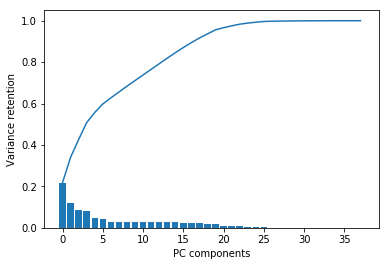

In [27]:
fig, ax = plt.subplots()
ax.bar(range(X_train_std.shape[1]), pca.explained_variance_ratio_)
ax.plot(range(X_train_std.shape[1]), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PC components")
plt.ylabel("Variance retention")

In [40]:
pd.DataFrame({"retention": np.cumsum(pca.explained_variance_ratio_)})\
    .query("retention>0.99")[:3]

,retention
0,0.218011
1,0.340155
2,0.425990
3,0.508032
4,0.556731
5,0.597943
6,0.627196
7,0.655609
8,0.683652
9,0.710830


In [30]:
%%time
pca = decomposition.PCA(random_state=1, n_components=23)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

CPU times: user 45.5 s, sys: 21.5 s, total: 1min 7s
Wall time: 1min


In [34]:
X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((3428901, 23), (1469530, 23), (3428901,), (1469530,))

In [36]:
%%time
est = linear_model.LogisticRegression()
est.fit(X_train_std, y_train)
print("Training accuracy:", est.score(X_train_std, y_train),
    "Test accuracy:", est.score(X_test_std, y_test))

Training accuracy: 0.9972489727758252 Test accuracy: 0.9971732458677264
CPU times: user 4min 23s, sys: 9.59 s, total: 4min 32s
Wall time: 4min 37s


In [35]:
%%time
est = linear_model.LogisticRegression()
est.fit(X_train_pca, y_train)
print("Training accuracy:", est.score(X_train_pca, y_train),
    "Test accuracy:", est.score(X_test_pca, y_test))

Training accuracy: 0.9973606703722271 Test accuracy: 0.9972794022578647
CPU times: user 3min 2s, sys: 4.94 s, total: 3min 7s
Wall time: 3min 8s
